In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
warnings.filterwarnings("ignore")
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,Normalizer,MaxAbsScaler
import xgboost as xgb

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier
from prettytable import PrettyTable
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

In [2]:
# remove the first row 
X_train = pd.read_csv('final_features_train.csv')
X_test = pd.read_csv('final_features_test.csv')
X_train.drop(['Unnamed: 0', 'id','is_duplicate'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0', 'id','is_duplicate'], axis=1, inplace=True)

In [3]:
X_train.head(2)

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,290_y,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y
0,0.000000,0.000000,0.249994,0.142855,0.166664,0.066666,0.0,1.0,9.0,10.5,...,-29.597940,0.823095,-4.816109,-5.479907,6.630353,-1.856820,-29.282809,-13.518551,5.345365,-6.478817
1,0.666644,0.666644,0.749981,0.749981,0.714276,0.714276,1.0,1.0,0.0,7.0,...,-3.153201,5.285417,-11.721915,-2.443879,1.611078,14.087319,-8.734612,17.292439,-12.531980,1.891034


In [4]:
X_test.head(2)

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,290_y,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y
0,0.249994,0.199996,0.333322,0.249994,0.249997,0.199998,0.0,0.0,2.0,9.0,...,-20.297007,6.642213,-9.122178,-8.069981,2.026412,5.864526,-3.265401,-6.888679,2.912968,10.988314
1,0.749981,0.499992,0.399992,0.399992,0.555549,0.454541,0.0,1.0,2.0,10.0,...,-14.236275,1.776201,-3.571437,1.745423,9.807658,1.744489,-12.963163,-5.804180,8.594582,6.916242


In [5]:
y_train = pd.read_csv('y_train.csv',names=['index','is_duplicate'])
y_test = pd.read_csv('y_test.csv',names=['index','is_duplicate'])

In [6]:
y_train.drop(['index'],axis=1, inplace=True)
y_test.drop(['index'],axis=1, inplace=True)

In [7]:
y_test.shape

(15000, 1)

<h2> 4.1 Converting strings to numerics </h2>

In [8]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numeric before we apply any model
cols = list(X_train.columns)
for i in cols:
    X_train[i] = X_train[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

In [9]:
cols = list(X_test.columns)
for i in cols:
    X_test[i] = X_test[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

In [10]:
X_train.dropna(axis =1,inplace = True)
X_train.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,290_y,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y
0,0.000000,0.000000,0.249994,0.142855,0.166664,0.066666,0.0,1.0,9.0,10.5,...,-29.597940,0.823095,-4.816109,-5.479907,6.630353,-1.856820,-29.282809,-13.518551,5.345365,-6.478817
1,0.666644,0.666644,0.749981,0.749981,0.714276,0.714276,1.0,1.0,0.0,7.0,...,-3.153201,5.285417,-11.721915,-2.443879,1.611078,14.087319,-8.734612,17.292439,-12.531980,1.891034
2,0.999975,0.571420,0.499992,0.499992,0.699993,0.437497,0.0,0.0,6.0,13.0,...,-13.008633,0.384223,-5.519671,-1.558217,1.227950,-11.123906,-5.659967,-2.756485,12.276674,5.923937
3,0.999950,0.222220,0.000000,0.000000,0.499988,0.086956,0.0,0.0,19.0,13.5,...,-0.106564,-0.165517,-0.260997,-0.494897,1.252344,0.409542,-0.968000,-0.271508,-0.129178,0.442294
4,0.999983,0.461535,0.499988,0.249997,0.799992,0.333332,0.0,0.0,14.0,17.0,...,3.025352,8.362124,0.138684,-3.223806,11.229796,-0.055775,-3.828882,-19.080990,2.049336,0.127271


In [11]:
X_test.dropna(axis =1,inplace = True)
X_test.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,290_y,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y
0,0.249994,0.199996,0.333322,0.249994,0.249997,0.199998,0.0,0.0,2.0,9.0,...,-20.297007,6.642213,-9.122178,-8.069981,2.026412,5.864526,-3.265401,-6.888679,2.912968,10.988314
1,0.749981,0.499992,0.399992,0.399992,0.555549,0.454541,0.0,1.0,2.0,10.0,...,-14.236275,1.776201,-3.571437,1.745423,9.807658,1.744489,-12.963163,-5.804180,8.594582,6.916242
2,0.666656,0.285712,0.666659,0.499996,0.666662,0.285713,0.0,0.0,20.0,25.0,...,-87.885074,7.025724,8.585276,13.638980,-14.037936,-27.001465,-11.675150,-31.286903,19.343752,35.398645
3,0.999986,0.874989,0.999967,0.999967,0.833326,0.769225,1.0,1.0,1.0,12.5,...,-1.235575,-0.706272,-12.065812,-4.899199,1.932689,1.185415,-8.701486,-5.794157,-2.371624,4.211791
4,0.999967,0.749981,0.999967,0.999967,0.999983,0.857131,1.0,1.0,1.0,6.5,...,-13.845745,2.463931,8.132972,-2.634704,-4.278039,-3.415972,-9.745452,-5.983493,-3.104610,0.970309


In [12]:
X_train.to_csv('final_features_after_removing_nan_train.csv')
X_test.to_csv('final_features_after_removing_nan_test.csv')

In [13]:
print("Number of Data points in train", X_train.shape[0])
print("Number of Data points in test", X_test.shape[0])

Number of Data points in train 35000
Number of Data points in test 15000


In [14]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

### Standization of Data

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8840581969602791


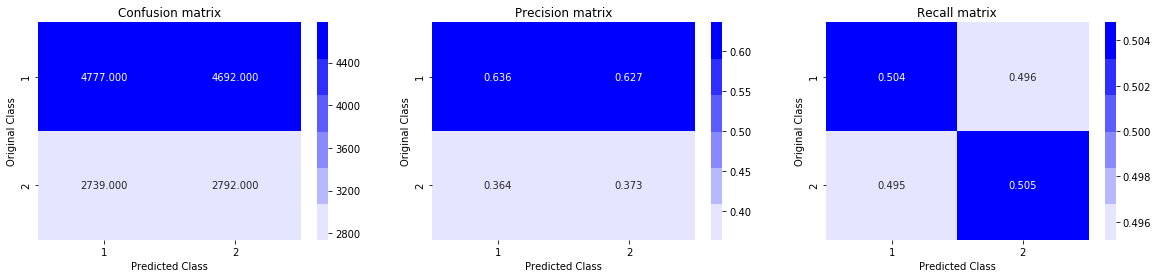

In [58]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.4601257589741342
For values of alpha =  0.0001 The log loss is: 0.46307632466152043
For values of alpha =  0.001 The log loss is: 0.44782629825448494
For values of alpha =  0.01 The log loss is: 0.41107299342120934
For values of alpha =  0.1 The log loss is: 0.4421005283515828
For values of alpha =  1 The log loss is: 0.4886044932017319
For values of alpha =  10 The log loss is: 0.5344942932746292


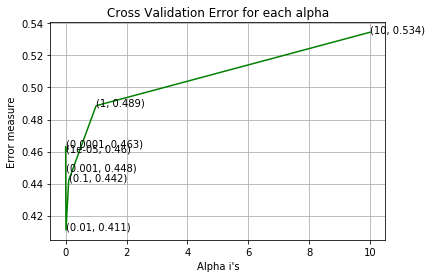

For values of best alpha =  0.01 The train log loss is: 0.40531329747860384
For values of best alpha =  0.01 The test log loss is: 0.41107299342120934
Total number of data points : 15000


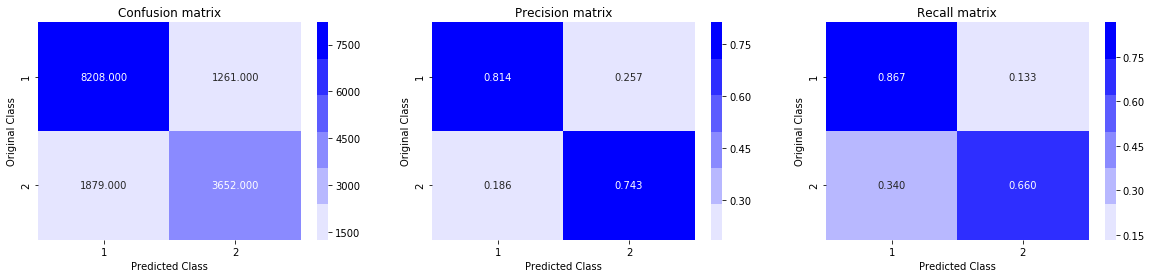

In [59]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42,class_weight='balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42,class_weight='balanced')
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.43495005114241647
For values of alpha =  0.0001 The log loss is: 0.4279841207036011
For values of alpha =  0.001 The log loss is: 0.4272615957952072
For values of alpha =  0.01 The log loss is: 0.4769739577248342
For values of alpha =  0.1 The log loss is: 0.4951804570591049
For values of alpha =  1 The log loss is: 0.658278096418528
For values of alpha =  10 The log loss is: 0.658278096418528


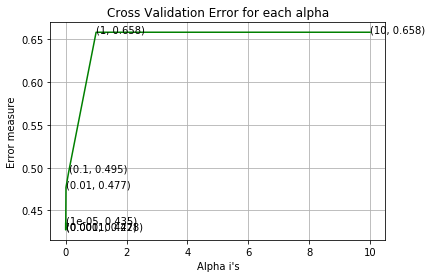

For values of best alpha =  0.001 The train log loss is: 0.41947975326107284
For values of best alpha =  0.001 The test log loss is: 0.4272615957952072
Total number of data points : 15000


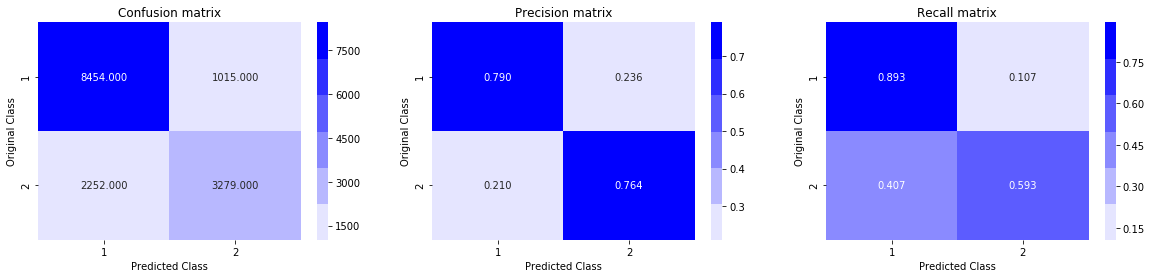

In [60]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42,class_weight='balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42,class_weight='balanced')
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost </h2>

In [16]:
params = {"max_depth":[3,5,10,15,20], 
          "n_estimators":[50,100,200,500,1000],
          "learning_rate" : [0.001,0.01,0.1],
          "subsample" : [0.2,0.5,0.8,0.9],
          "reg_lambda":[200,300,400],
          "min_child_weight":[3,5],
          "gamma": [0,1,5,10,15]
         }

clf = xgb.XGBClassifier(n_jobs = -1,)
clf.fit(X_train, y_train)
model = RandomizedSearchCV(estimator= clf,param_distributions= params,cv=5,scoring='neg_log_loss',verbose= 2,n_jobs=-1)
model.fit(X_train, y_train)
print("#"*117,"Best Estimator for XgBoost Classifier using Random Search :","\n",model.best_estimator_)
print("#"*117, "Best parameters for XgBoost Classifier using Random Search:", "\n",model.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 96.5min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##################################################################################################################### Best Estimator for XgBoost Classifier using Random Search : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=5, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=5, missing=None, n_estimators=500,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=300, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.9)
##################################################################################################################### Best parameters for XgBoost Classifier using Random Search: 
 {'subsample': 0.9, 'reg_lambda': 300, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 5}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The train log loss is: 0.31562687127579
The test log loss is: 0.358017830951764
Total number of data points : 15000


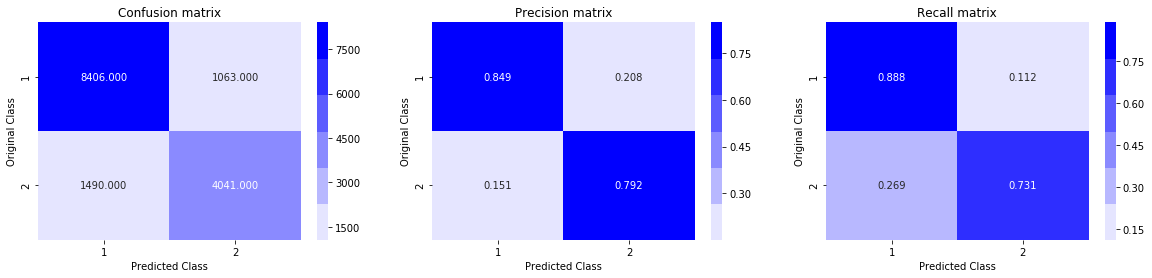

In [19]:
clf = xgb.XGBClassifier(max_depth=model.best_params_['max_depth'], subsample=model.best_params_['subsample'],
                        reg_lambda=model.best_params_['reg_lambda']
                        ,n_estimators=model.best_params_['n_estimators'],
                        min_child_weight= model.best_params_['min_child_weight'],
                        learning_rate= model.best_params_['learning_rate'],
                        gamma = model.best_params_['gamma'],n_jobs = -1)


clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print("The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h1> 5. Assignments </h1>

1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
2. Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss.


In [23]:
df = pd.read_csv('train.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [27]:
df.drop(labels=['id','qid1','qid2'],axis = 1,inplace = True)
df_train = df.loc[X_train.index]
df_test = df.loc[X_test.index]
print('Shape of Train dataset :', df_train.shape)
print('Shape of test dataset: ',df_test.shape)

Shape of Train dataset : (34999, 3)
Shape of test dataset:  (15000, 3)


In [28]:
tfidf = TfidfVectorizer(max_features= 2000,max_df= 5)
questions1_train = tfidf.fit_transform(df_train['question1'])
questions2_train = tfidf.fit_transform(df_train['question2'])
questions1_test = tfidf.transform(df_test['question1'])
questions2_test = tfidf.transform(df_test['question2'])


In [29]:
print('Shape of tfidf vectorizer of train data for questions id1:', questions1_train.shape)
print('Shape of tfidf vectorizer of train data for questions id2:', questions2_train.shape)
print('Shape of tfidf vectorizer of test data for questions id1:', questions1_test.shape)
print('Shape of tfidf vectorizer of test data for questions id2:', questions2_test.shape)

Shape of tfidf vectorizer of train data for questions id1: (34999, 2000)
Shape of tfidf vectorizer of train data for questions id2: (34999, 2000)
Shape of tfidf vectorizer of test data for questions id1: (15000, 2000)
Shape of tfidf vectorizer of test data for questions id2: (15000, 2000)


In [30]:
list_columns = data.columns
list_columns[:30]

Index(['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2', '0_x', '1_x',
       '2_x', '3_x'],
      dtype='object')

In [31]:
X_train_tfidf = hstack((questions1_train,questions2_train)).tocsr()
X_train_tfidf = hstack((X_train_tfidf,X_train[['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',]])).tocsr()

In [32]:
X_test_tfidf = hstack((questions1_test,questions2_test)).tocsr()
X_test_tfidf = hstack((X_test_tfidf,X_test[['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',]])).tocsr()

In [35]:
scaler = MaxAbsScaler()
X_train_norm = scaler.fit_transform( X_train_tfidf)
X_test_norm = scaler.transform(X_test_tfidf)

For values of alpha =  1e-05 The log loss is: 0.44807280095848584
For values of alpha =  0.0001 The log loss is: 0.44568384896079843
For values of alpha =  0.001 The log loss is: 0.47760708643960015
For values of alpha =  0.01 The log loss is: 0.5250146570341068
For values of alpha =  0.1 The log loss is: 0.550687641385517
For values of alpha =  1 The log loss is: 0.5575659324749089
For values of alpha =  10 The log loss is: 0.5638416604309615


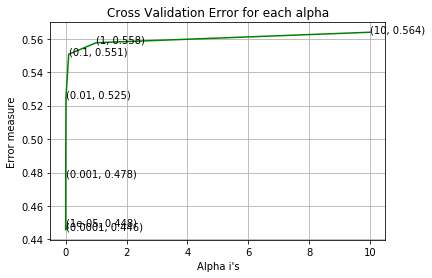

For values of best alpha =  0.0001 The train log loss is: 0.4263813084458943
For values of best alpha =  0.0001 The test log loss is: 0.44568384896079843
Total number of data points : 15000


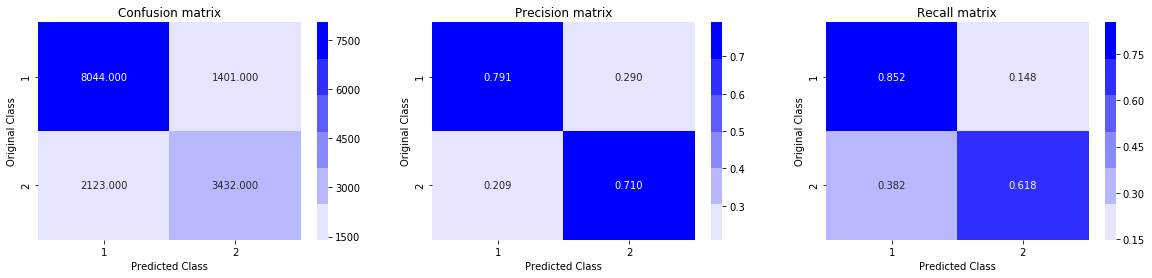

In [36]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42,class_weight='balanced')
    clf.fit(X_train_norm, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_norm, y_train)
    predict_y = sig_clf.predict_proba(X_test_norm)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42,class_weight='balanced')
clf.fit(X_train_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_norm, y_train)

predict_y = sig_clf.predict_proba(X_train_norm)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_norm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.4484548491628401
For values of alpha =  0.0001 The log loss is: 0.42675181285370156
For values of alpha =  0.001 The log loss is: 0.4658893673352474
For values of alpha =  0.01 The log loss is: 0.5209758361972782
For values of alpha =  0.1 The log loss is: 0.6028909996505822
For values of alpha =  1 The log loss is: 0.6591328488516495
For values of alpha =  10 The log loss is: 0.6591328488516495


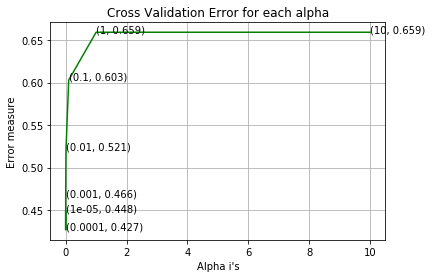

For values of best alpha =  0.0001 The train log loss is: 0.4206746181423988
For values of best alpha =  0.0001 The test log loss is: 0.42675181285370156
Total number of data points : 15000


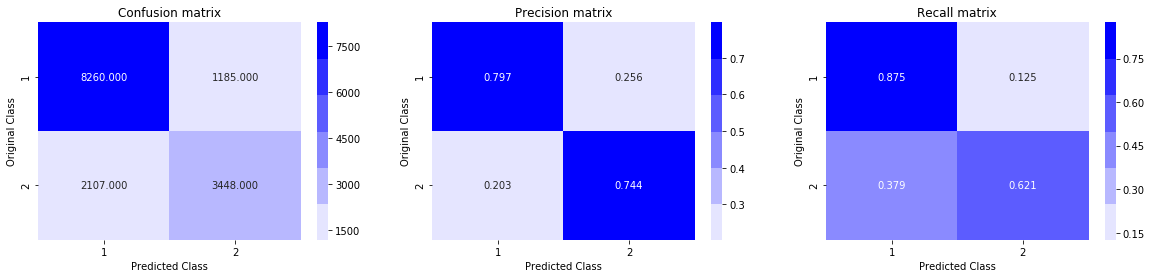

In [37]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42,class_weight='balanced')
    clf.fit(X_train_norm, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_norm, y_train)
    predict_y = sig_clf.predict_proba(X_test_norm)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42,class_weight='balanced')
clf.fit(X_train_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_norm, y_train)

predict_y = sig_clf.predict_proba(X_train_norm)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_norm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# XgBoost

In [38]:
params = {"max_depth":[3,5,10,15,20], 
          "n_estimators":[50,100,200,500,1000],
          "learning_rate" : [0.001,0.01,0.1],
          "subsample" : [0.2,0.5,0.8,0.9],
          "reg_lambda":[200,300,400],
          "min_child_weight":[3,5],
          "gamma": [0,1,5,10,15]
         }

clf = xgb.XGBClassifier(n_jobs = -1)
clf.fit(X_train_norm, y_train)
model = RandomizedSearchCV(estimator= clf,param_distributions= params,cv=5,scoring='neg_log_loss',verbose= 2,n_jobs=-1)
model.fit(X_train_norm, y_train)
print("#"*117,"Best Estimator for XgBoost Classifier using Random Search :","\n",model.best_estimator_)
print("#"*117, "Best parameters for XgBoost Classifier using Random Search:", "\n",model.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 11.2min finished


##################################################################################################################### Best Estimator for XgBoost Classifier using Random Search : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=15, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=200, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.5)
##################################################################################################################### Best parameters for XgBoost Classifier using Random Search: 
 {'subsample': 0.5, 'reg_lambda': 200, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0}


For values of best alpha =  0.0001 The train log loss is: 0.348806665970882
For values of best alpha =  0.0001 The test log loss is: 0.3677470397041377
Total number of data points : 15000


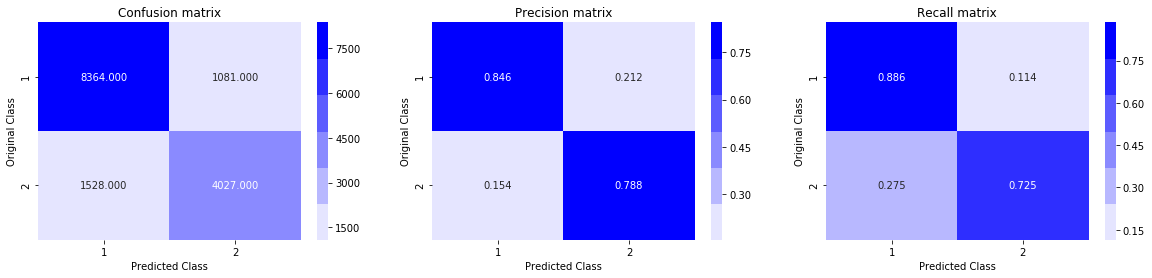

In [39]:
clf = xgb.XGBClassifier(max_depth=model.best_params_['max_depth'], subsample=model.best_params_['subsample'],
                        reg_lambda=model.best_params_['reg_lambda']
                        ,n_estimators=model.best_params_['n_estimators'],
                        min_child_weight= model.best_params_['min_child_weight'],
                        learning_rate= model.best_params_['learning_rate'],
                        gamma = model.best_params_['gamma'],n_jobs = -1)

clf.fit(X_train_norm, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_norm, y_train)

predict_y = sig_clf.predict_proba(X_train_norm)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_norm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)


In [2]:
print("Model Performance with basic, advanced and TFIDF - weighted w2v features combined together")
table = PrettyTable()
table.field_names = ['Model', 'log loss']
table.add_row(['Logistic Regression', 0.415])
table.add_row(['Linear SVM', 0.425])
table.add_row(['XgBoost', 0.377])
print(table,'\n')

print("Model Performance with bsic, advanced and TFIDF features combined together")
table1 = PrettyTable()
table1.field_name = ['Model', 'log loss']
table1.add_row(['Logistic Regression', 0.445])
table1.add_row(['Linear SVM', 0.426])
table1.add_row(['XgBoost', 0.367])
print(table1,'\n')

Model Performance with basic, advanced and TFIDF - weighted w2v features combined together
+---------------------+----------+
|        Model        | log loss |
+---------------------+----------+
| Logistic Regression |  0.415   |
|      Linear SVM     |  0.425   |
|       XgBoost       |  0.377   |
+---------------------+----------+ 

Model Performance with bsic, advanced and TFIDF features combined together
+---------------------+---------+
|       Field 1       | Field 2 |
+---------------------+---------+
| Logistic Regression |  0.445  |
|      Linear SVM     |  0.426  |
|       XgBoost       |  0.367  |
+---------------------+---------+ 



# Conclusion:-

- Compared to all the three models, XgBoost performs better. It has the least log loss. The perfomance of all the models is almost the same with TFIDF - weighted w2v and TFIDF vectorization.

# Procedure: -

- Problem statement for this case study is as follows:
  - To identify which questions asked on Quora are duplicates of questions that have already been asked. That is, to predict whether a pair of questions are duplicates or not. Its a binary classifications problem.
  
- Following dataset is provided to implement this project.  
    - Data will be in a file Train.csv
    - Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate
    - Size of Train.csv - 60MB
    - Number of rows in Train.csv = 404,290 
- First i checked whether that given dataset has any duplicates.
- The given dataset is imbalanaced. % of similar questions are 32% and 62% of the questions are not similar.
- The total number of unique questions are ard 53k. Maximum number of times a single question is repeated is 157 times.
- After performing EDA on the dataset, next I performed some basic feature extractions before doing data cleaning. Following feature were extracted.
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 
 
- After extracting the features, following EDA was done on few of the extracted features.
- Next step was to perform advanced feature extraction. Before performing advanced feature extracting, preprocessing of text was done. Following steps were involved while doing the preprocessing of text :-
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions.
    
- After performing text pre - processing, following Advanced feature extraction was performed.
   - __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words)) 
   - __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
   - __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
   - __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
   - __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
   - __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
   - __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
   
   - __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
   
   - __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
   - __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
   - __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
    http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
   - __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
    http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
   - __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
    http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/ 
   
   - __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
   - __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))
   
- Next I plotted the word clouds for duplicate and non duplicate questions, so that we can observe the most frequently repeated words in duplicate and non duplicate questions.
- Next I plotted the pair plots of all the advanced extracted features. So that we can determine which of the advanced features are important in deteriming whether a pair of question is duplicate or non duplicate.
- Next I tried featurizing the text data using TFIDF, w2v and TFIDF weigthed w2v.
- At the end, I combined the basic features , advanced features and TFIDF - weighted w2v features to form the final features.
- After standardizing the final feature dataset, various classical ML models were applied.
- As a part of Assignment, instead of using TFIDF - weighted w2v, I used TFIDF.
- After obtaining the TFIDF vectors for the text, it was combined with basic and advanced features.
- The combined features were then standardized and given to various ML models for training.
- The performance of all the models that used were used is shown in the table above.

# END